In [689]:
import pickle

In [690]:
import numpy as np

In [691]:
def expit(x):
    """Compute softmax values for each sets of scores in x."""
#     e_x = np.exp(x - np.max(x))
    return 1 / (1 + np.exp(-x))

In [692]:
# with open('Data_Generation//LSTM_Heavy_Dropout//heavy_dropout_first_lstm.pkl', 'rb') as f:
#     first_lstm = pickle.load(f)  


In [693]:
with open('Data_Generation//LSTM_Heavy_Dropout//heavy_dropout_first_lstm.pkl', 'rb') as f:
    lstm_heavy_dropout = pickle.load(f)  

In [694]:
cur_idx = 1

In [695]:
heavy_gt = expit(lstm_heavy_dropout[cur_idx][2])

In [696]:
heavy_gt

array([[0.9305587 ],
       [0.8504916 ],
       [0.17953317],
       [0.15217617],
       [0.22870165],
       [0.8411469 ],
       [0.13360462],
       [0.8029408 ]], dtype=float32)

In [697]:
# enkf_heavy[0][-1].mean(0)

In [698]:
# lstm_heavy[0][-1].mean(1)

In [699]:
# lstm_low[0][-1].mean(1)

In [700]:
with open('Data_Generation//LSTM_Low_Dropout//low_dropout_first_lstm.pkl', 'rb') as f:
    lstm_low_dropout = pickle.load(f)  

In [701]:
low_gt = expit(lstm_low_dropout[cur_idx][2])

In [702]:
low_gt

array([[0.87137884],
       [0.87273544],
       [0.21138403],
       [0.2486824 ],
       [0.3625226 ],
       [0.83825743],
       [0.14714448],
       [0.7580857 ]], dtype=float32)

In [703]:
# with open(r'EnKF_Real_World_doc2vec_lstm_real_world_heavy_dropout.pkl', "rb") as f:
#     enkf_heavy = pickle.load(f)

In [704]:
with open(r'Real_World_EnKF_LSTM_Doc2Vec_Heavy_Dropout/Real_World_EnKF_LSTM_Doc2Vec_var_weights_32_num_ens_216.pkl', "rb") as f:
    enkf_heavy = pickle.load(f)

In [705]:
with open(r'Real_World_EnKF_LSTM_Doc2Vec_Low_Dropout/Real_World_EnKF_LSTM_Doc2Vec_var_weights_32_num_ens_216.pkl', "rb") as f:
    enkf_low = pickle.load(f)

In [706]:
# lstm_low[0][-1].shape

In [707]:
# np.percentile(lstm_low[0][-1], q = [0.025, 0.975], axis = 0)

In [708]:
import pandas as pd

In [709]:
catch_preds_enkf_heavy = []
for i in range(0, enkf_heavy[cur_idx][-1].shape[1]):
    enkf_preds = enkf_heavy[cur_idx][-1][:,i,:]
    enkf_preds_df = pd.DataFrame(enkf_preds)
    enkf_preds_df["Test_Sample_ID"] = i 
    enkf_preds_df.columns = ["EnKF_Preds", "Test_Sample_ID"]
    catch_preds_enkf_heavy.append(enkf_preds_df)

In [710]:
catch_preds_enkf_heavy_df = pd.concat(catch_preds_enkf_heavy)

In [711]:
catch_preds_enkf_low = []
for i in range(0, enkf_low[cur_idx][-1].shape[1]):
    enkf_preds = enkf_low[cur_idx][-1][:,i,:]
    enkf_preds_df = pd.DataFrame(enkf_preds)
    enkf_preds_df["Test_Sample_ID"] = i 
    enkf_preds_df.columns = ["EnKF_Preds", "Test_Sample_ID"]
    catch_preds_enkf_low.append(enkf_preds_df)

In [712]:
catch_preds_enkf_low_df = pd.concat(catch_preds_enkf_low)

In [713]:
# catch_preds_mcd_low_df = pd.concat(catch_preds_mcd_low)

In [714]:
ids = np.sort([i for i in range(0, heavy_gt.shape[0]) if heavy_gt[i] < 0.5])
ids_more = np.sort([i for i in range(0, heavy_gt.shape[0]) if heavy_gt[i] > 0.5])

In [715]:
catch_preds_enkf_heavy_df_filtered_ids_more = catch_preds_enkf_heavy_df[catch_preds_enkf_heavy_df["Test_Sample_ID"].isin(ids_more)]

In [716]:
catch_preds_enkf_low_df_filtered_ids_more = catch_preds_enkf_low_df[catch_preds_enkf_low_df["Test_Sample_ID"].isin(ids_more)]

In [717]:
catch_preds_enkf_heavy_df_filtered_ids = catch_preds_enkf_heavy_df[catch_preds_enkf_heavy_df["Test_Sample_ID"].isin(ids)]

In [718]:
catch_preds_enkf_low_df_filtered_ids = catch_preds_enkf_low_df[catch_preds_enkf_low_df["Test_Sample_ID"].isin(ids)]

In [719]:
# catch_preds_lstm_heavy_df_filtered = catch_preds_mcd_heavy_df[catch_preds_mcd_heavy_df["Test_Sample_ID"].isin(ids_more)]

In [720]:
# catch_preds_lstm_low_df_filtered = catch_preds_mcd_low_df[catch_preds_mcd_low_df["Test_Sample_ID"].isin(ids_more)]

In [721]:
filtered_true_enkf_heavy_df = heavy_gt[ids_more,:]

In [722]:
filtered_true_enkf_low_df = low_gt[ids_more,:]

In [723]:
import seaborn as sns

In [724]:
import matplotlib.pyplot as plt

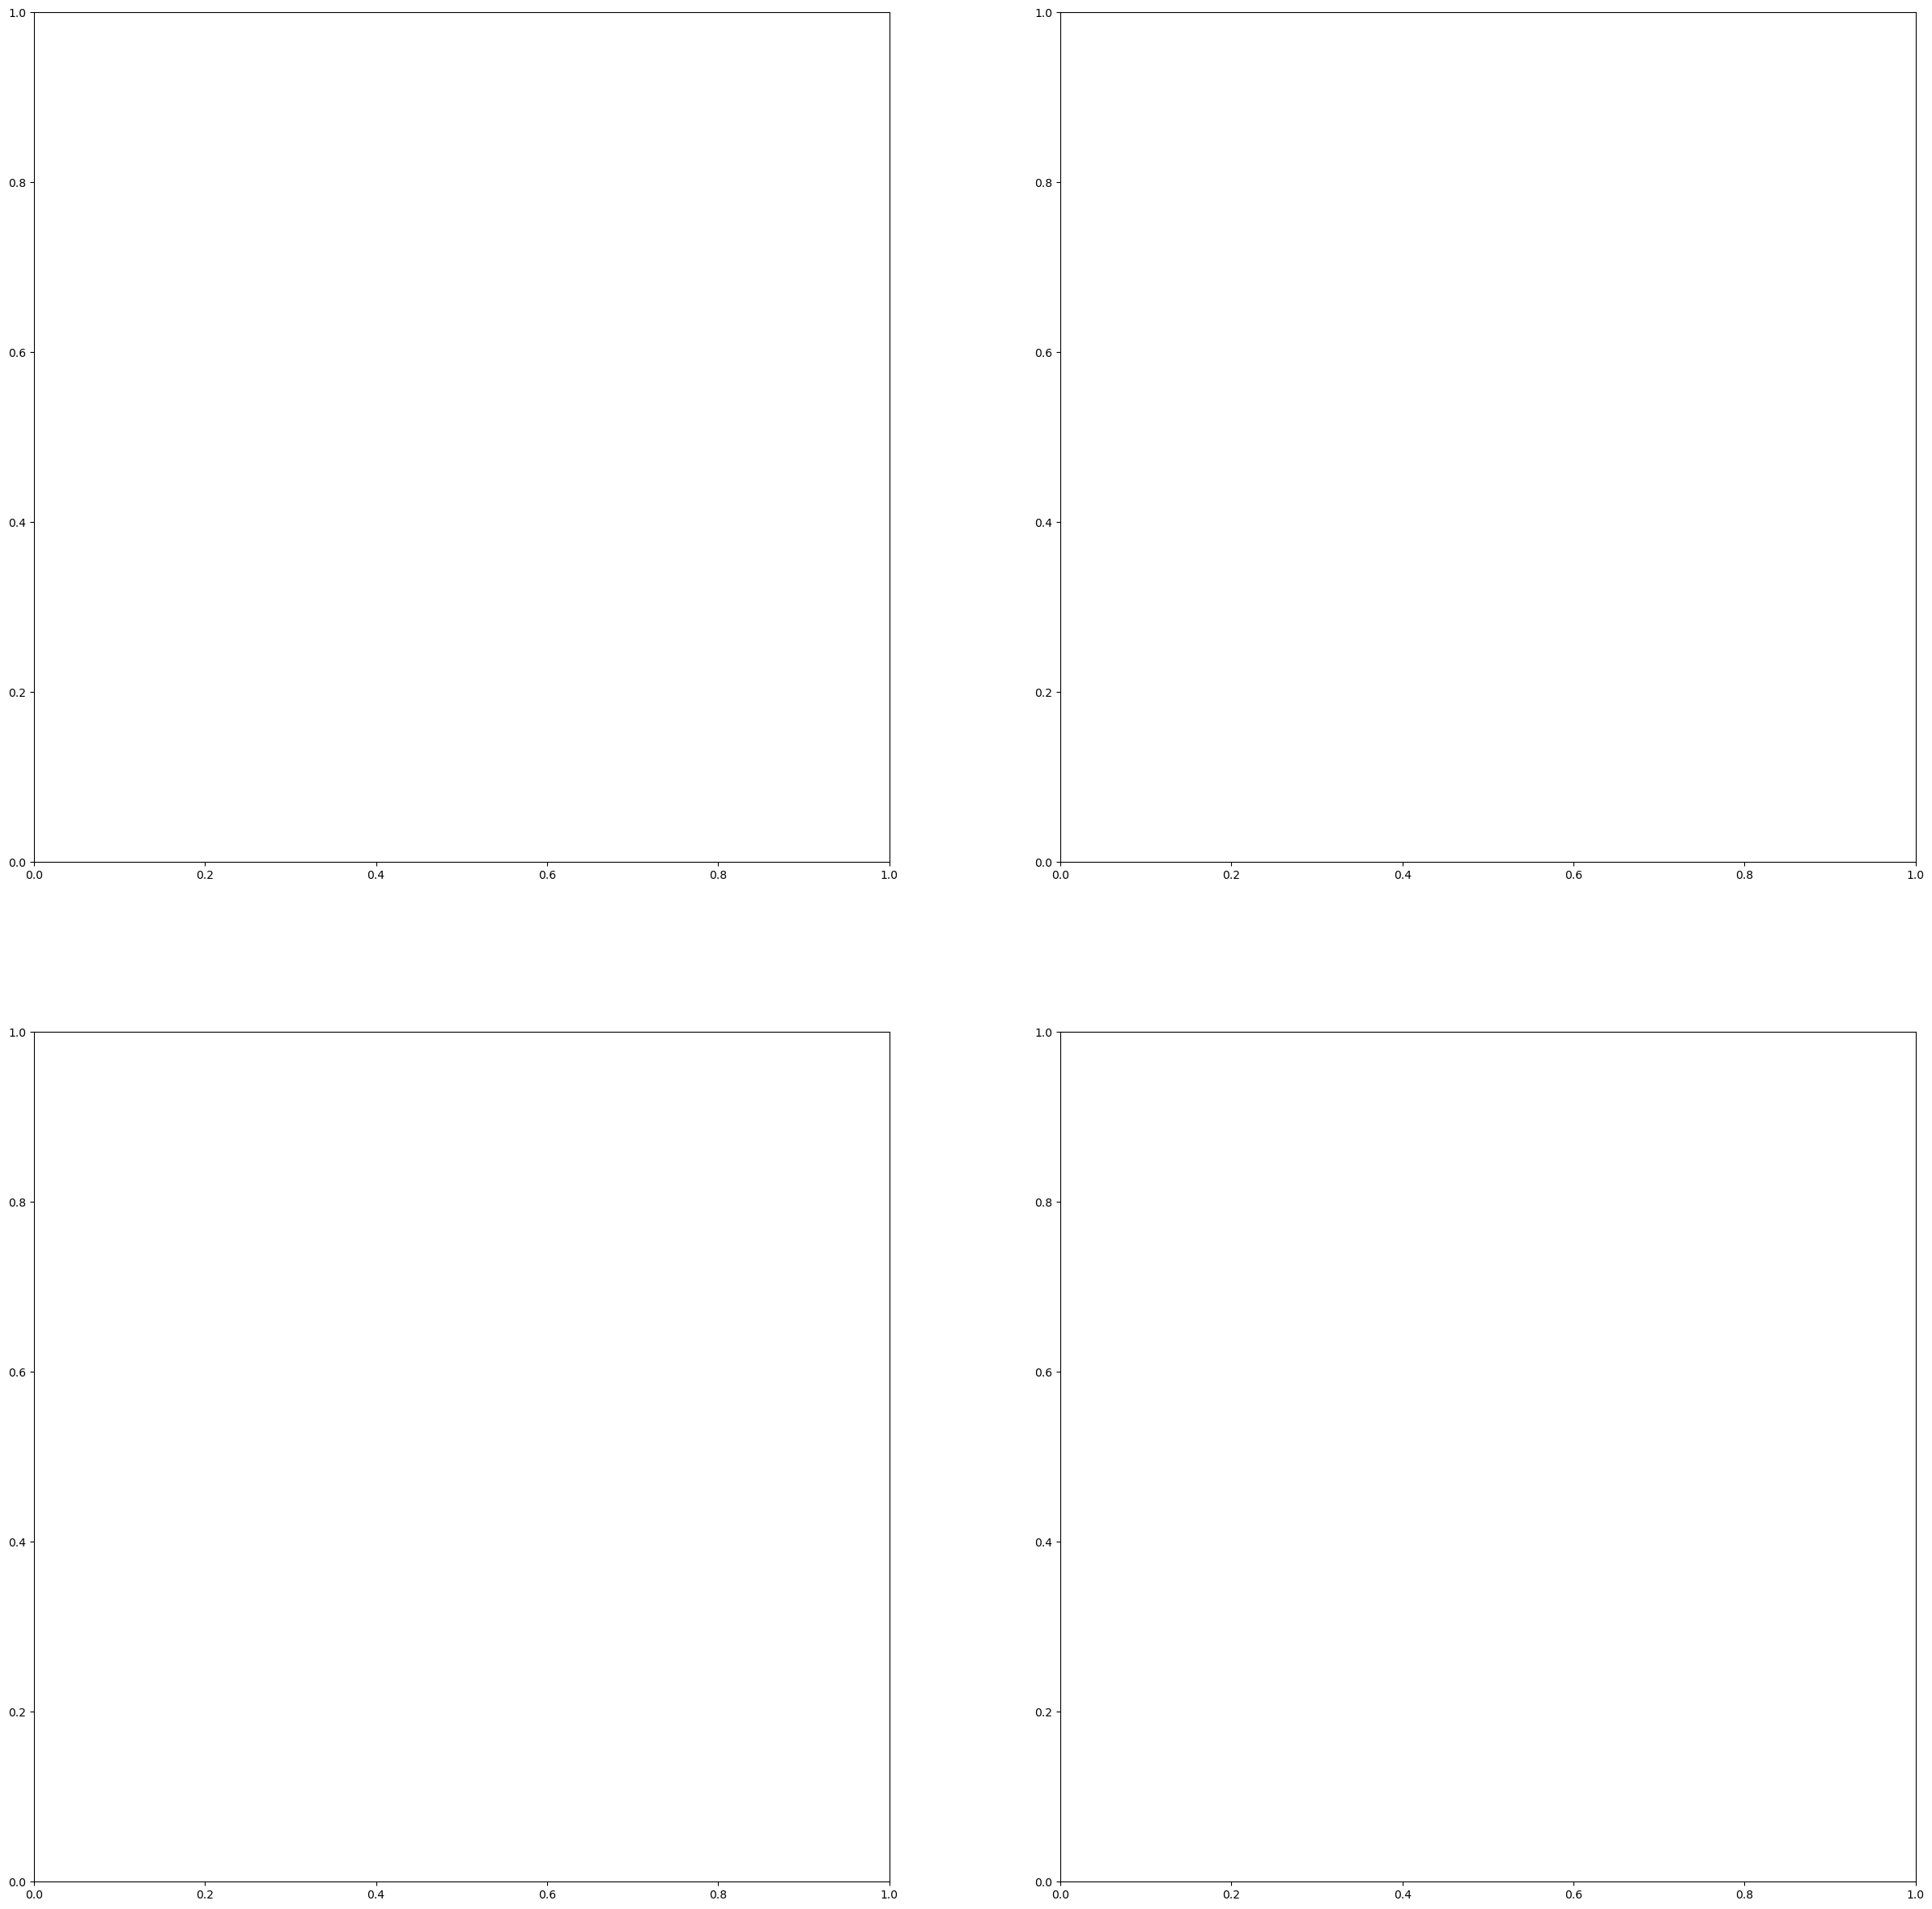

In [725]:
f, axes = plt.subplots(2, 2, figsize = (30, 30))
axes = axes.ravel()

In [726]:
label_size = 25
font_size = 30
scatter_size = 200

In [727]:
# catch_preds_enkf_heavy_df_filtered = catch_preds_enkf_heavy_df[catch_preds_enkf_heavy_df["Test_Sample_ID"].isin(ids_more)]
filtered_true_enkf_heavy_df = heavy_gt[ids,:]
# plt.figure(figsize = (10,10))
fig4 = sns.boxplot(catch_preds_enkf_heavy_df_filtered_ids, x="Test_Sample_ID", y="EnKF_Preds", showfliers=False, ax=axes[2])
axes[2].scatter(range(0, filtered_true_enkf_heavy_df.shape[0]), filtered_true_enkf_heavy_df, c = "black", s = scatter_size)
axes[2].set_xlabel("Test Sample ID", fontsize = font_size, fontweight = "bold")
axes[2].set_ylabel("MEnKF-ANN Heavy Dropout Predictions", fontsize = font_size, fontweight = "bold")
axes[2].tick_params(labelsize = label_size, labelcolor = "black",axis='both')
texts = [t.get_text()  for t in axes[2].get_xticklabels()]
axes[2].set_xticklabels(texts,weight = "bold")
axes[2].set_yticklabels(axes[2].get_yticks().round(2),weight = "bold")
# axes[0].set_xticklabels(axes[0].get_xticks(),weight = "bold")
# axes[0].set_yticklabels(axes[0].get_yticks().round(2),weight = "bold")
# axes[0].yticks(fontsize = 10, fontweight = "bold")
# plt.show()

/tmp/ipykernel_1377361/224721556.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_yticklabels(axes[2].get_yticks().round(2),weight = "bold")


[Text(0, 0.08, '0.08'),
 Text(0, 0.1, '0.1'),
 Text(0, 0.12, '0.12'),
 Text(0, 0.14, '0.14'),
 Text(0, 0.16, '0.16'),
 Text(0, 0.18, '0.18'),
 Text(0, 0.2, '0.2'),
 Text(0, 0.22000000000000003, '0.22'),
 Text(0, 0.24, '0.24'),
 Text(0, 0.26, '0.26')]

In [728]:
# catch_preds_enkf_heavy_df_filtered = catch_preds_enkf_heavy_df[catch_preds_enkf_heavy_df["Test_Sample_ID"].isin(ids)]
filtered_true_enkf_heavy_df = heavy_gt[ids_more,:]
# plt.figure(figsize = (10,10))
fig4 = sns.boxplot(catch_preds_enkf_heavy_df_filtered_ids_more, x="Test_Sample_ID", y="EnKF_Preds", showfliers=False, ax=axes[0])
axes[0].scatter(range(0, filtered_true_enkf_heavy_df.shape[0]), filtered_true_enkf_heavy_df, c = "black", s = scatter_size)
axes[0].set_xlabel("Test Sample ID", fontsize = font_size, fontweight = "bold")
axes[0].set_ylabel("MEnKF-ANN Heavy Dropout Prediction", fontsize = font_size, fontweight = "bold")
axes[0].tick_params(labelsize = label_size, labelcolor = "black",axis='both')
texts = [t.get_text()  for t in axes[0].get_xticklabels()]
axes[0].set_xticklabels(texts,weight = "bold")
axes[0].set_yticklabels(axes[0].get_yticks().round(2),weight = "bold")
# axes[0].set_xticklabels(axes[0].get_xticks(),weight = "bold")
# axes[0].set_yticklabels(axes[0].get_yticks().round(2),weight = "bold")
# axes[0].yticks(fontsize = 10, fontweight = "bold")
# plt.show()

/tmp/ipykernel_1377361/1899216358.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(axes[0].get_yticks().round(2),weight = "bold")


[Text(0, 0.7250000000000001, '0.73'),
 Text(0, 0.7500000000000001, '0.75'),
 Text(0, 0.7750000000000001, '0.78'),
 Text(0, 0.8, '0.8'),
 Text(0, 0.8250000000000001, '0.82'),
 Text(0, 0.8500000000000001, '0.85'),
 Text(0, 0.8750000000000001, '0.88'),
 Text(0, 0.9000000000000001, '0.9'),
 Text(0, 0.925, '0.92'),
 Text(0, 0.9500000000000001, '0.95')]

In [729]:
# catch_preds_enkf_heavy_df_filtered = catch_preds_enkf_heavy_df[catch_preds_enkf_heavy_df["Test_Sample_ID"].isin(ids_more)]
filtered_true_enkf_heavy_df = low_gt[ids,:]
# plt.figure(figsize = (10,10))
fig4 = sns.boxplot(catch_preds_enkf_low_df_filtered_ids, x="Test_Sample_ID", y="EnKF_Preds", showfliers=False, ax=axes[3])
axes[3].scatter(range(0, filtered_true_enkf_heavy_df.shape[0]), filtered_true_enkf_heavy_df, c = "black", s = scatter_size)
axes[3].set_xlabel("Test Sample ID", fontsize = font_size, fontweight = "bold")
axes[3].set_ylabel("MEnKF-ANN Low Dropout Prediction", fontsize = font_size, fontweight = "bold")
axes[3].tick_params(labelsize = label_size, labelcolor = "black",axis='both')
texts = [t.get_text()  for t in axes[3].get_xticklabels()]
axes[3].set_xticklabels(texts,weight = "bold")
axes[3].set_yticklabels(axes[3].get_yticks().round(2),weight = "bold")
# axes[0].set_xticklabels(axes[0].get_xticks(),weight = "bold")
# axes[0].set_yticklabels(axes[0].get_yticks().round(2),weight = "bold")
# axes[0].yticks(fontsize = 10, fontweight = "bold")
# plt.show()

/tmp/ipykernel_1377361/832295994.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[3].set_yticklabels(axes[3].get_yticks().round(2),weight = "bold")


[Text(0, 0.0, '0.0'),
 Text(0, 0.05, '0.05'),
 Text(0, 0.1, '0.1'),
 Text(0, 0.15000000000000002, '0.15'),
 Text(0, 0.2, '0.2'),
 Text(0, 0.25, '0.25'),
 Text(0, 0.30000000000000004, '0.3'),
 Text(0, 0.35000000000000003, '0.35'),
 Text(0, 0.4, '0.4'),
 Text(0, 0.45, '0.45')]

In [730]:
# catch_preds_enkf_heavy_df_filtered = catch_preds_enkf_heavy_df[catch_preds_enkf_heavy_df["Test_Sample_ID"].isin(ids_more)]
filtered_true_enkf_heavy_df = low_gt[ids_more,:]
# plt.figure(figsize = (10,10))
fig4 = sns.boxplot(catch_preds_enkf_low_df_filtered_ids_more, x="Test_Sample_ID", y="EnKF_Preds", showfliers=False, ax=axes[1])
axes[1].scatter(range(0, filtered_true_enkf_heavy_df.shape[0]), filtered_true_enkf_heavy_df, c = "black", s = scatter_size)
axes[1].set_xlabel("Test Sample ID", fontsize = font_size, fontweight = "bold")
axes[1].set_ylabel("MEnKF-ANN Low Dropout Prediction", fontsize = font_size, fontweight = "bold")
axes[1].tick_params(labelsize = label_size, labelcolor = "black",axis='both')
texts = [t.get_text()  for t in axes[1].get_xticklabels()]
axes[1].set_xticklabels(texts,weight = "bold")
axes[1].set_yticklabels(axes[1].get_yticks().round(2),weight = "bold")
# axes[0].set_xticklabels(axes[0].get_xticks(),weight = "bold")
# axes[0].set_yticklabels(axes[0].get_yticks().round(2),weight = "bold")
# axes[0].yticks(fontsize = 10, fontweight = "bold")
# plt.show()

/tmp/ipykernel_1377361/444266440.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(axes[1].get_yticks().round(2),weight = "bold")


[Text(0, 0.6000000000000001, '0.6'),
 Text(0, 0.6500000000000001, '0.65'),
 Text(0, 0.7000000000000001, '0.7'),
 Text(0, 0.7500000000000001, '0.75'),
 Text(0, 0.8, '0.8'),
 Text(0, 0.8500000000000001, '0.85'),
 Text(0, 0.9000000000000001, '0.9'),
 Text(0, 0.9500000000000002, '0.95')]

In [731]:
f.tight_layout()

In [732]:
f.savefig("enkfs_dropouts.png", dpi=300)

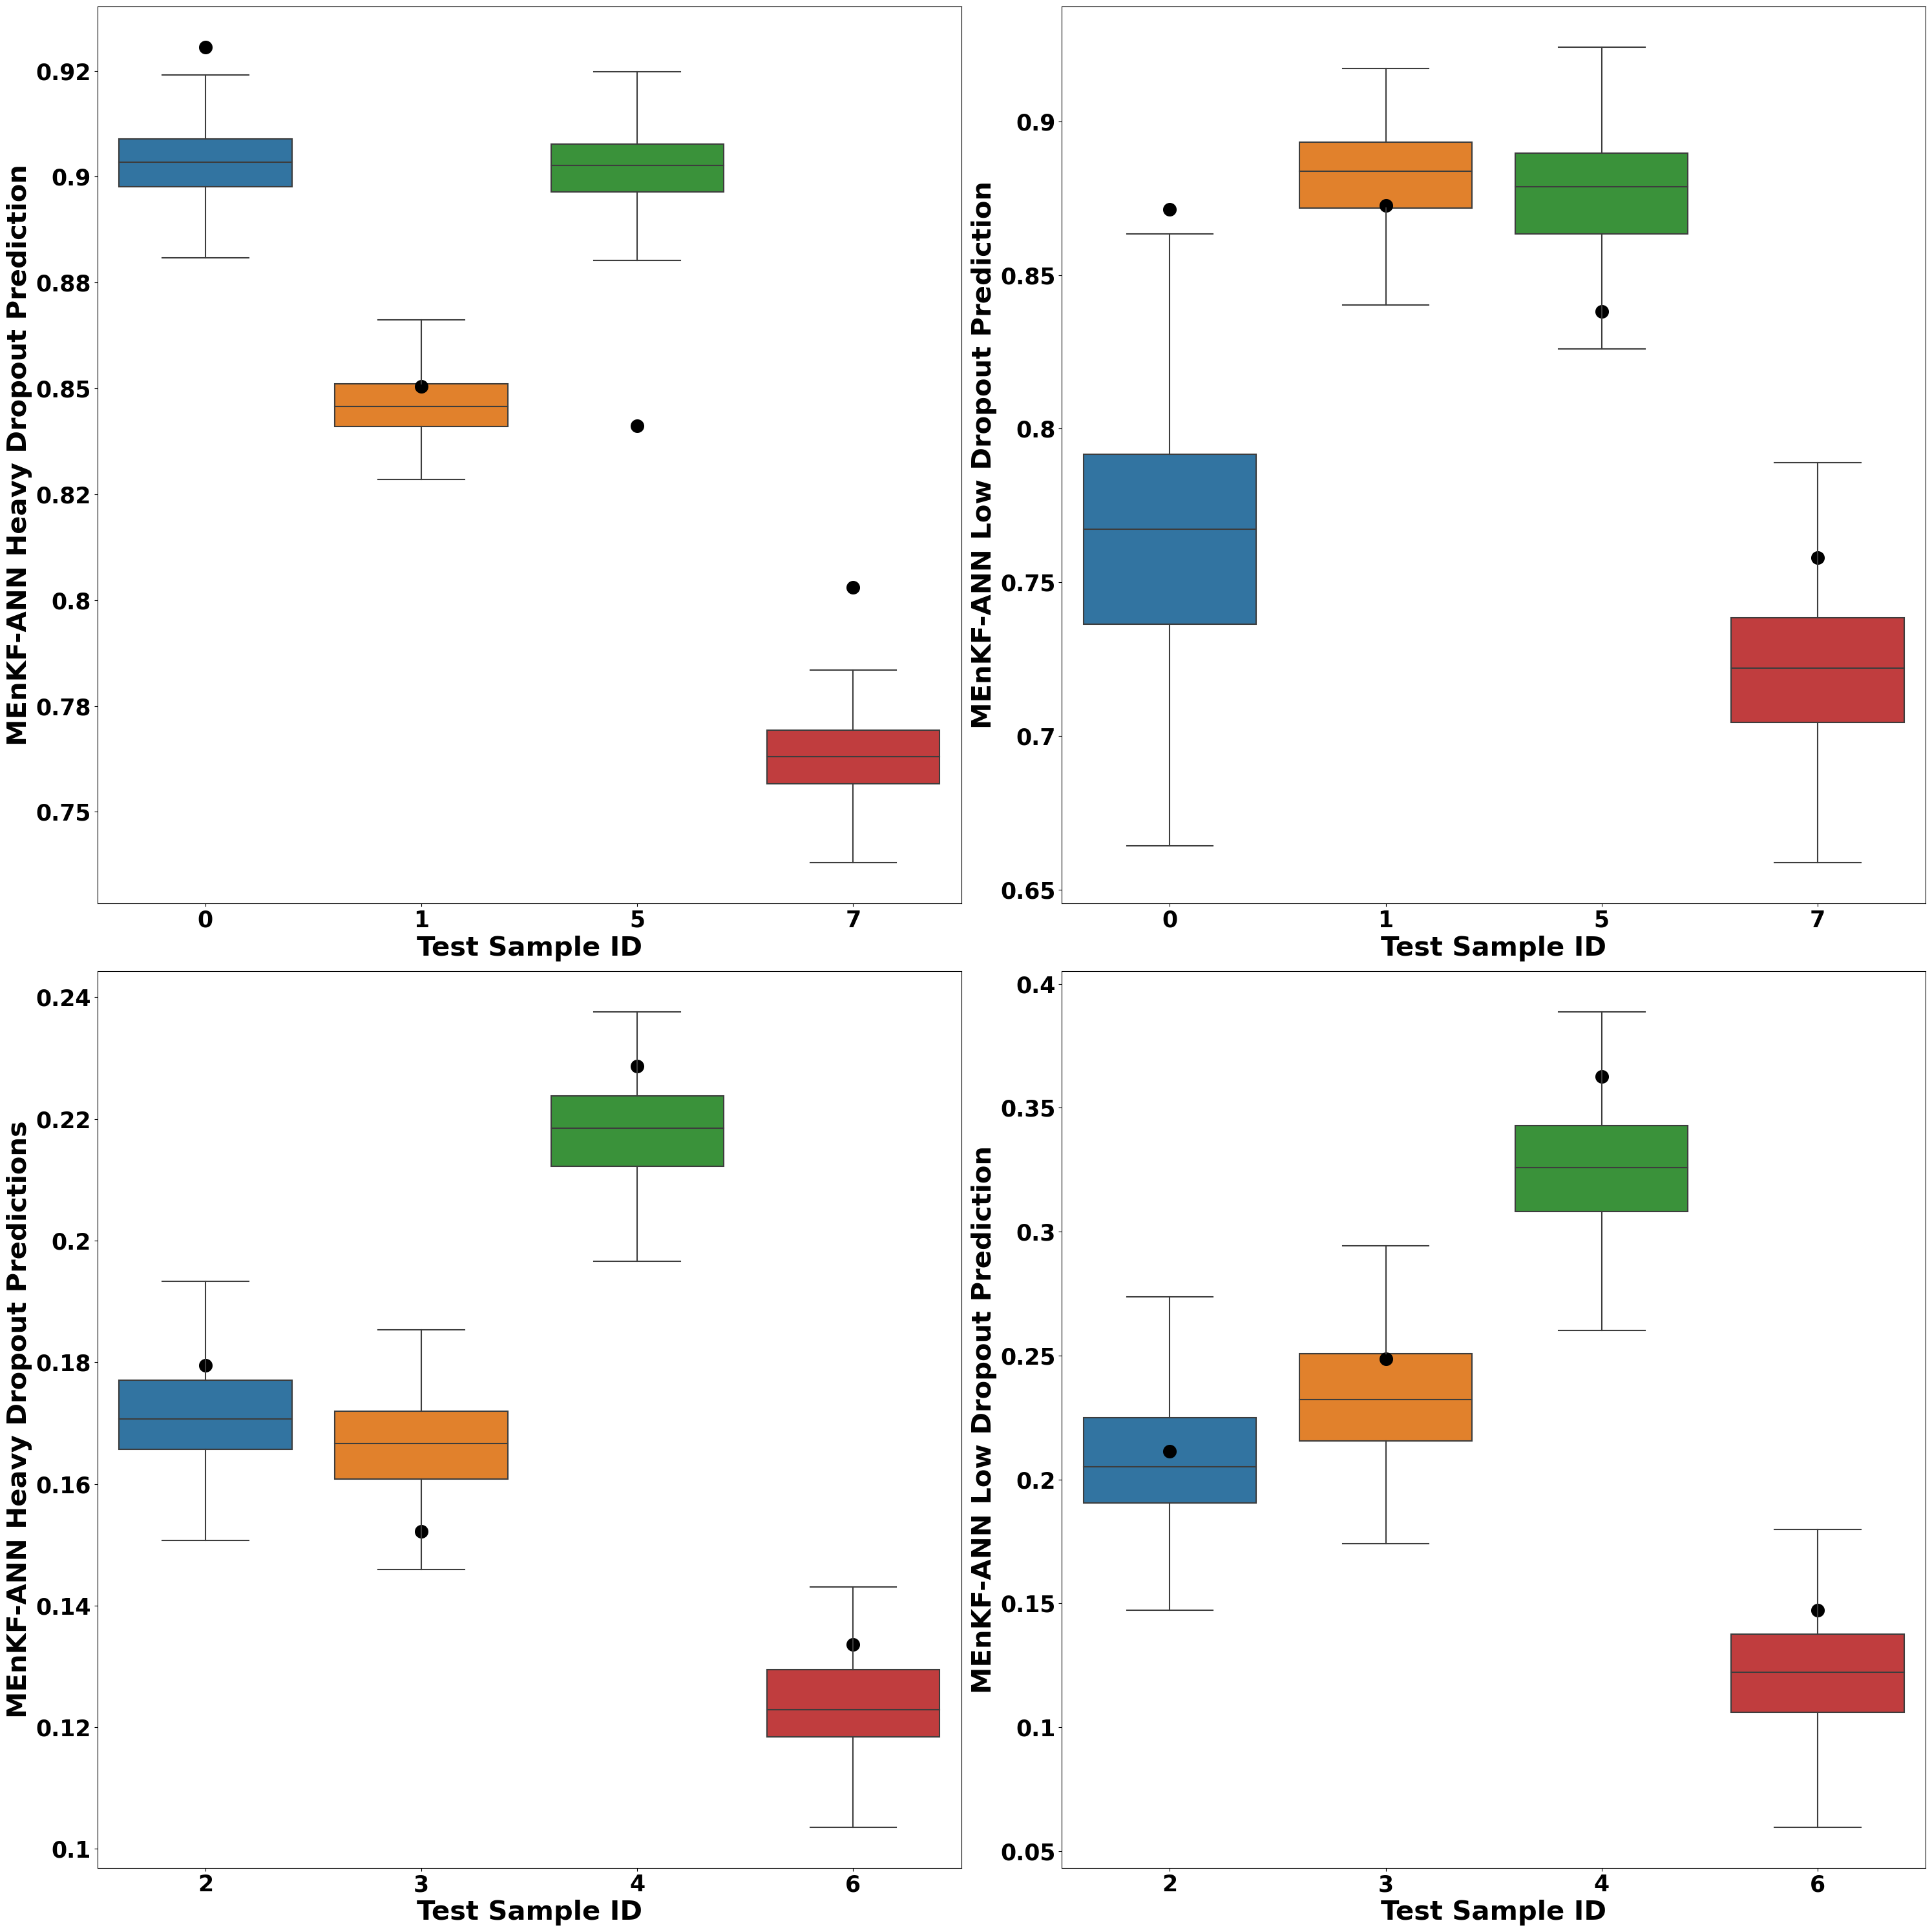

In [733]:
f